## João Victor Nascimento da Silva
# Atividade Final de Machine Learning

In [78]:
import pandas as pd
import seaborn as sns

Selecionei um dataset que contém dados de alunos ficticios do ensino médio estadunidense, e com base nos dados disponíveis, o objetivo é encontrar relações para conseguir prever a sua Nota final (GradeClass)

In [79]:
# Importando o Dataset
data = pd.read_csv('./Student_performance_data.csv')
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### Descrição dos atributos

StudentID: Um identificador único atribuído a cada estudante (1001 a 3392).

<b>Detalhes Demográficos</b>

Idade: A idade dos estudantes varia de 15 a 18 anos.<br>
Gênero: Gênero dos estudantes, onde 0 representa Masculino e 1 representa Feminino.<br>
Etnia: A etnia dos estudantes, codificada da seguinte forma:<br>
0: Caucasiano<br>
1: Afro-Americano<br>
2: Asiático<br>
3: Outros<br>
Educação dos Pais: O nível de educação dos pais, codificado da seguinte forma:<br>
0: Nenhuma<br>
1: Ensino Médio<br>
2: Alguma Faculdade<br>
3: Bacharelado<br>
4: Superior<br>

<b>Hábitos de Estudo</b>

Tempo de Estudo Semanal: Tempo semanal de estudo em horas, variando de 0 a 20.<br>
Ausências: Número de ausências durante o ano letivo, variando de 0 a 30.<br>
Aulas de Reforço: Status de aulas de reforço, onde 0 indica Não e 1 indica Sim.<br>

<b>Envolvimento dos Pais</b>

Apoio dos Pais: O nível de apoio dos pais, codificado da seguinte forma:<br>
0: Nenhum<br>
1: Baixo<br>
2: Moderado<br>
3: Alto<br>
4: Muito Alto<br>

<b>Atividades Extracurriculares</b>

Atividades Extracurriculares: Participação em atividades extracurriculares, onde 0 indica Não e 1 indica Sim.<br>
Esportes: Participação em esportes, onde 0 indica Não e 1 indica Sim.<br>
Música: Participação em atividades musicais, onde 0 indica Não e 1 indica Sim.<br>
Voluntariado: Participação em voluntariado, onde 0 indica Não e 1 indica Sim.<br>

<b>Desempenho Acadêmico</b>

GPA: Média de notas (Grade Point Average) em uma escala de 2.0 a 4.0, influenciada pelos hábitos de estudo, envolvimento dos pais e atividades extracurriculares.<br>

<b>Variável Alvo (Target Variable): Classe de Nota</b>

Classe de Nota: Classificação das notas dos estudantes com base no GPA:<br>
0: 'A' (GPA >= 3.5)<br>
1: 'B' (3.0 <= GPA < 3.5)<br>
2: 'C' (2.5 <= GPA < 3.0)<br>
3: 'D' (2.0 <= GPA < 2.5)<br>
4: 'F' (GPA < 2.0)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## Análise dos Dados
Correlação dos dados

In [81]:
data.drop(columns=['StudentID'], inplace=True)

In [82]:
data.corr()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


Como podemos ver, os dados com mais relação com a coluna GradeClass são:<br>
Absences/Ausencias<br>
GPA (Inversamente proporcional)

Distribuição das várias com mais relação

In [83]:
data.groupby('Absences').size()/data.shape[0]

Absences
0     0.028010
1     0.035535
2     0.028846
3     0.033027
4     0.028846
5     0.034699
6     0.036789
7     0.035953
8     0.038043
9     0.028010
10    0.025502
11    0.029682
12    0.038462
13    0.038880
14    0.035117
15    0.036371
16    0.033027
17    0.033863
18    0.033027
19    0.037625
20    0.037625
21    0.034699
22    0.029682
23    0.035953
24    0.033863
25    0.038880
26    0.033445
27    0.035117
28    0.022575
29    0.028846
dtype: float64

In [84]:
data.groupby('GPA').size()/data.shape[0]

GPA
0.000000    0.006689
0.012063    0.000418
0.019798    0.000418
0.021156    0.000418
0.026469    0.000418
              ...   
3.947093    0.000418
3.951460    0.000418
3.979421    0.000418
3.984674    0.000418
4.000000    0.002926
Length: 2371, dtype: float64

Como podemos ver elas estão bem distribuidas

<Axes: xlabel='Absences', ylabel='GPA'>

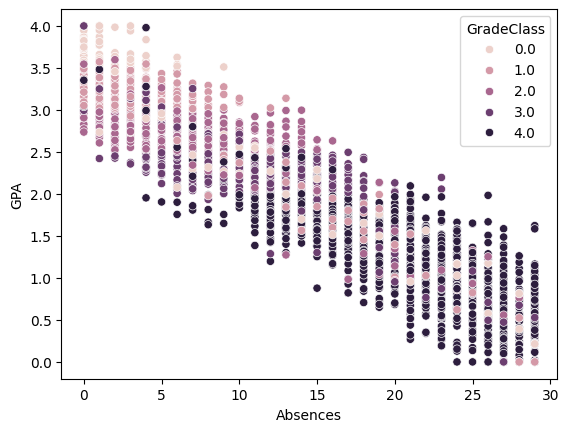

In [85]:
sns.scatterplot(data=data, x='Absences', y='GPA', hue='GradeClass')

Podemos ver que não há ruidos e outliers com o gráfico de scatterplot

## Preparação dos dados
Scaling / normalização

In [86]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)

In [87]:
data_min_max_scaled.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.666667,1.0,0.000000,0.50,0.992773,0.241379,1.0,0.50,0.0,0.0,1.0,0.0,0.732299,0.50
1,1.000000,0.0,0.000000,0.25,0.771270,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.760729,0.25
2,0.000000,0.0,0.666667,0.75,0.210718,0.896552,0.0,0.50,0.0,0.0,0.0,0.0,0.028151,1.00
3,0.666667,1.0,0.000000,0.75,0.501965,0.482759,0.0,0.75,1.0,0.0,0.0,0.0,0.513555,0.75
4,0.666667,1.0,0.000000,0.50,0.233840,0.586207,1.0,0.75,0.0,0.0,0.0,0.0,0.322015,1.00


## Treinamento e Validação

In [88]:
colunas = ['Absences', 'GPA']
X = data_min_max_scaled[colunas]
y = data_min_max_scaled['GradeClass']

In [89]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

X_train.shape = (1913, 2), y_train.shape = (1913,)
X_test.shape = (479, 2), y_test.shape = (479,)


Os dados de treinamento e teste foram separados

## Regressão Linear

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predição')

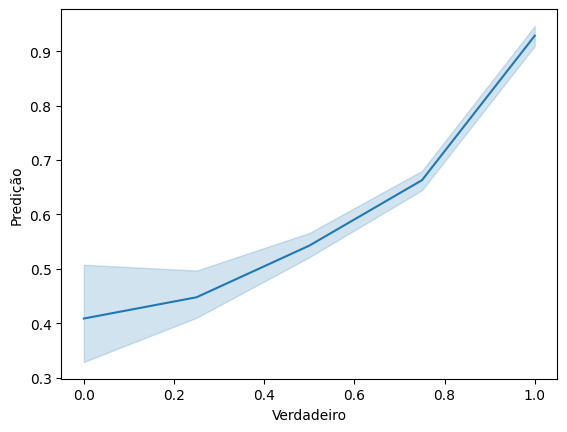

In [93]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição')

Conclusão da Regressão Linear: ela obteve um resultado satisfatório, principalmente para prever os alunos que tiraram as maiores notas, agora como o gráfico aponta, nos casos onde as notas foram mais baixas, a predição foi um pouco não precisa.

## Regressão Ridge

In [94]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [95]:
y_pred_ridge = ridge.predict(X_test)

Text(0, 0.5, 'Predição')

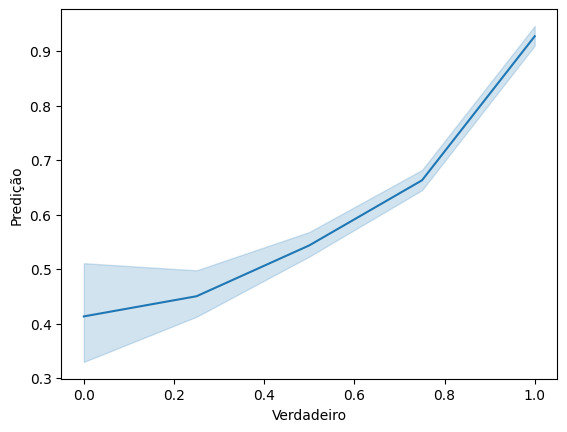

In [96]:
sns.lineplot(x=y_test, y=y_pred_ridge)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição')

Conclusão da Regressão Ridge: sendo uma variação da Regressão linear, porém voltada para combater overfitting, o resultado foi basicamente identico, indicando que nosso modelo não possui overfitting. Assim como a anterior, ela obteve um resultado satisfatório, principalmente para prever os alunos que tiraram as maiores notas, agora como o gráfico aponta, nos casos onde as notas foram mais baixas, a predição foi um pouco não precisa.

## Regressão de Suporte Vetorial (SVR)

In [97]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR()

In [98]:
y_pred_svr = svr.predict(X_test)

Text(0, 0.5, 'Predição')

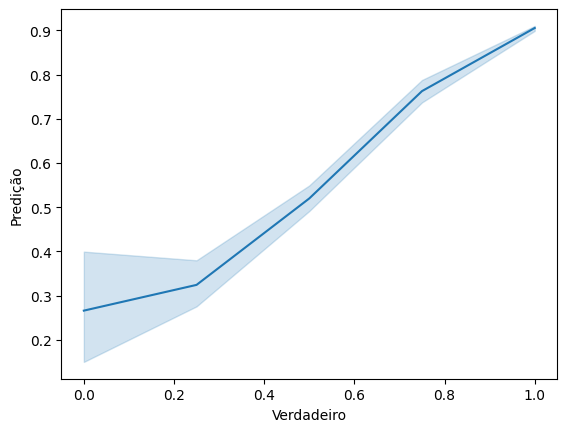

In [99]:
sns.lineplot(x=y_test, y=y_pred_svr)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição')

Conclusão da Regressão de Suporte Vetorial: Essa regressão teve um resultado diferentes das outras, porém não necessariamente melhor. Houve uma variação no momento em que o gráfico começa a subir com as notas, mas no início continua com dificuldades.

## Conclusão

Como pudemos ver, com a utilização da Regressão Linear, obtivemos um resultado satisfatório em relação à predição das notas dos alunos, os outros modelos não apresentaram resultados muito diferentes do primeiro, então o consideramos o melhor. Além disso como o Ridge não apresentou mudanças relacionado ao primeiro, concluímos que o modelo não possuí overfitting. Com mais um gráfico abaixo, ilustro a porcentagem que a predição está acertando as notas.

Text(10.482716049382711, 0.5, 'Predição')

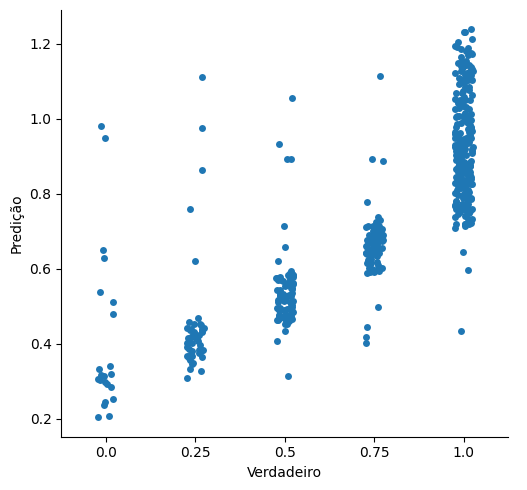

In [100]:
sns.catplot(x=y_test, y=y_pred)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição')

Com isso, chegamos a conclusão de que, neste dataset especifico, a nota dos alunos consiste em uma relação da baixa Ausência as aulas e boas notas GPA. Carregando estas variáveis no modelo, conseguimos uma boa previsão das notas finais.

Para o futuro, seria interessante realizarmos testes com outros modelos, principalmente de outros tipos, como Clustering, e alterar um pouco o tamanho dos conjuntos de treino e teste, com isso poderiamos encontrar resultados até melhores para prever as notas finais dos alunos.

Graças a análise desses dados e com o treinamento do modelo, podemos prever alunos que terão as piores notas, a ajuda-los, com programas de estudo ou atividades extras, para que consigam aprender mais e melhorar seus resultados nas provas futuras. Seria uma ferramente muito interessante para instituições.